In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from pyts.image import GramianAngularField
from pyts.image import RecurrencePlot
from pyts.image import MarkovTransitionField
from pyts.datasets import load_gunpoint

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [6]:
# Author: Johann Faouzi <johann.faouzi@gmail.com>
# License: BSD-3-Clause



# Parameters
X1, _, _, _ = load_gunpoint(return_X_y=True)

In [9]:
X1.shape

(50, 150)

In [3]:
df = pd.read_csv('E:/База/MicexD/IMOEX_060101_190529.csv')
data=df.filter(['<CLOSE>'])
dataset = np.array(data)
dataset
scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(dataset)

In [8]:
dataset.shape

(3350, 1)

In [6]:
close100.shape()

NameError: name 'close100' is not defined

In [12]:
close100 = []
for i in range(0, len(dataset)-100):
    close100.append(dataset[i:i+100,])
close100 = np.array(close100)    
display(close100.shape)
close100= np.reshape(close100, (3250,100)) 
display(close100.shape)

(3250, 100, 1)

(3250, 100)

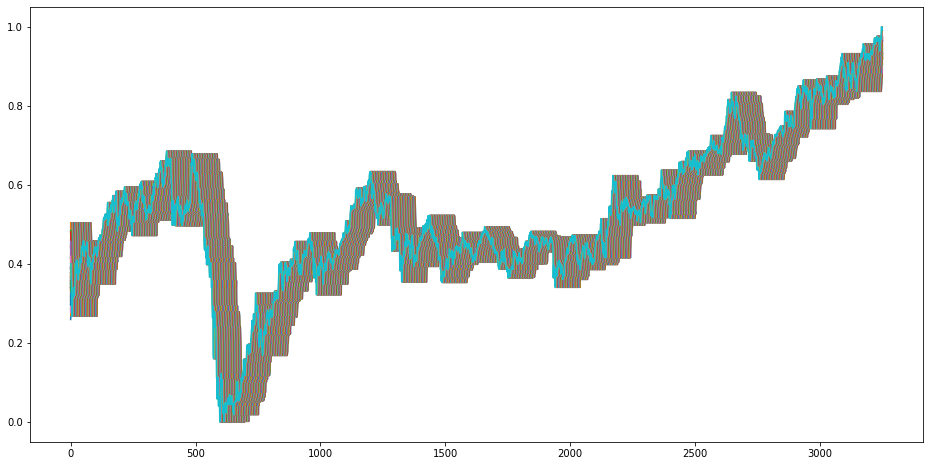

In [17]:
plt.figure(figsize = (16, 8))
plt.plot(close100)
plt.show()

In [27]:
dataset

array([[0.2594196 ],
       [0.27029914],
       [0.28992654],
       ...,
       [0.99083804],
       [0.99728953],
       [0.98638646]])

In [73]:
np.reshape(X_rp[0], (100, 100, 3))

ValueError: cannot reshape array of size 10000 into shape (100,100,3)

In [72]:
X_rp[0].shape

(100, 100)

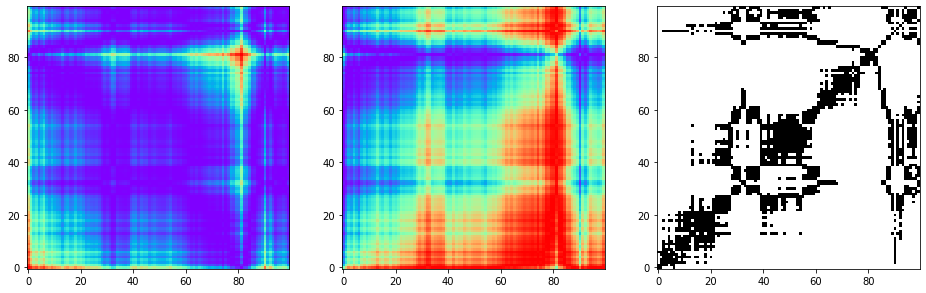

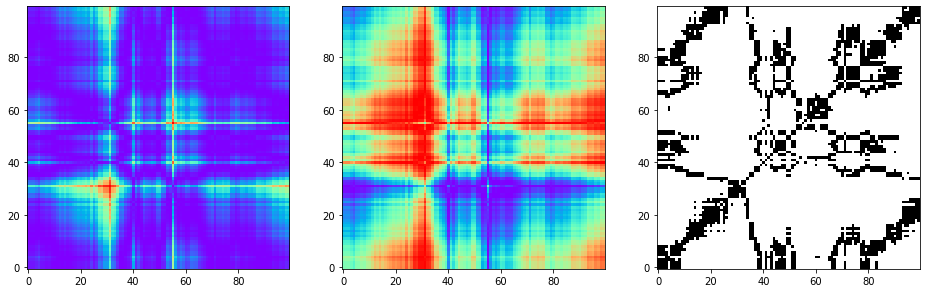

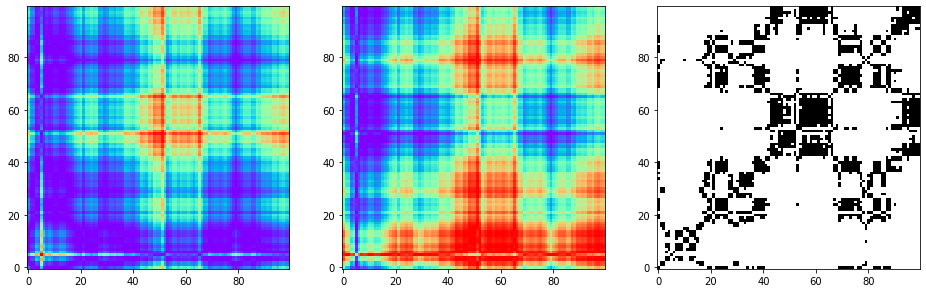

Wall time: 1.36 s


In [74]:
%%time

"""
=====================
Gramian Angular Field
=====================
A Gramian Angular Field is an image obtained from a time series, representing
some temporal correlation between each time point. Two methods are
available: Gramian Angular Summation Field and Gramian Angular Difference
Field. This example illustrates the transformation on the first sample of
the *GunPoint* dataset. Both images are plotted side by side to illustrate
the differences.
It is implemented as :class:`pyts.image.GramianAngularField`.
"""


for i in range(0,150,50):
    X = close100[i]
    # Transform the time series into Gramian Angular Fields
    gasf = GramianAngularField(image_size=100, method='summation')
    X_gasf = gasf.fit_transform(X.reshape(1,-1))
    gadf = GramianAngularField(image_size=100, method='difference')
    X_gadf = gadf.fit_transform(X.reshape(1,-1))
    rp = RecurrencePlot(threshold='point', percentage=20)
    X_rp = rp.fit_transform(X.reshape(1,-1))
#    mtf = MarkovTransitionField(image_size=24)
#    X_mtf = mtf.fit_transform(X.reshape(1,-1))

    # Show the images for the first time series
    fig, axes = plt.subplots(ncols = 3, nrows=1, figsize = (16,16))

    axes[0].imshow(X_gasf[0], cmap='rainbow', origin='lower')
    axes[1].imshow(X_gadf[0], cmap='rainbow', origin='lower')
    axes[2].imshow(X_rp[0],   cmap='binary',  origin='lower')
#    axes[3].plot(X)

    plt.show()

In [23]:
X_gasf = pd.DataFrame(X_gasf)

ValueError: Must pass 2-d input

In [25]:
X_gasf.shape

(50, 24, 24)

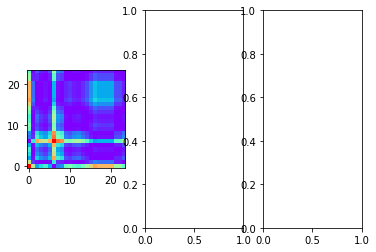

<Figure size 11520x576 with 0 Axes>

In [173]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

#  Двумерный массив пикселей:
smile = [[0, 0, 1, 1, 1, 1, 1, 1, 0, 0],
         [0, 1, 0, 0, 0, 0, 0, 0, 1, 0],
         [1, 0, 0, 0, 0, 0, 0, 0, 0, 1],
         [1, 0, 0, 1, 0, 0, 1, 0, 0, 1],
         [1, 0, 0, 0, 0, 0, 0, 0, 0, 1],
         [1, 0, 0, 0, 0, 0, 0, 0, 0, 1],
         [1, 0, 1, 0, 0, 0, 0, 1, 0, 1],
         [1, 0, 0, 1, 1, 1, 1, 0, 0, 1],
         [0, 1, 0, 0, 0, 0, 0, 0, 1, 0],
         [0, 0, 1, 1, 1, 1, 1, 1, 0, 0]]

fig, ax = plt.subplots(nrows=1, ncols=3)
fig = plt.figure(figsize=(160, 8))

ax[0].imshow(X_gasf[0], cmap='rainbow', origin='lower')
#ax.imshow(image, cmap='rainbow', origin='lower')

#fig.set_figwidth(6)    #  ширина и
#fig.set_figheight(6)    #  высота "Figure"

plt.show()